## Linear Regression

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week4\day1\USA_Housing.csv')
df

df.columns = df.columns.str.lower().str.replace(pat='[. ]', repl='_', regex=True)

X = df.drop(columns=['address',"price"])
y = df['price']

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_columns = X.columns
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled,columns=X_columns)

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Modelling
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression().fit(X_train, y_train)

# Prediction
y_pred = model_reg.predict(X_test)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_compare.head()
df1

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

R2 = r2_score(y_test, y_pred)
print('R squared:', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('Adjusted R2:', adj_R2)
MAE = mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', MAPE)
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)
print()

import statsmodels.api as sm

# Statsmodels OLS modelini qurun
X_train_stat = sm.add_constant(X_train)  # Sabit (constant) sütunu əlavə edin
X_test_stat = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_stat).fit()

# Model xülasəsi
print(model.summary())
print()

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Məlumatları yükləyin
data = df

# Xüsusiyyətləri seçin
X_VIF = data[['avg__area_income', 'avg__area_house_age', 'avg__area_number_of_rooms', 
              'avg__area_number_of_bedrooms', 'area_population']]

# Sabit sütununu əlavə edin
X_VIF = add_constant(X_VIF)

# VIF dəyərlərini hesablayın
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
print()

# Xüsusiyyətlərin əhəmiyyətini hesablamaq
importance = model_reg.coef_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

R squared: 0.9146454505138086
Adjusted R2: 0.9142161016733348
MAE: 82657.94605892098
MAPE: 0.0748012797995974
MSE: 10549721686.159071
RMSE: 102711.83810135553

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     9044.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:41:23   Log-Likelihood:                -51755.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err

## Design Tree Regression

R squared: 0.7418681573774061
Adjusted R2: 0.7405697074648177
MAE: 141181.72965701963
MAPE: 0.12985942397863648
MSE: 31904791418.814064
RMSE: 178619.12388883243

                        Feature  VIF
0              avg__area_income 1.00
1           avg__area_house_age 1.00
2     avg__area_number_of_rooms 1.27
3  avg__area_number_of_bedrooms 1.27
4               area_population 1.00

                        Feature  Importance
0              avg__area_income        0.43
1           avg__area_house_age        0.23
4               area_population        0.19
2     avg__area_number_of_rooms        0.13
3  avg__area_number_of_bedrooms        0.01


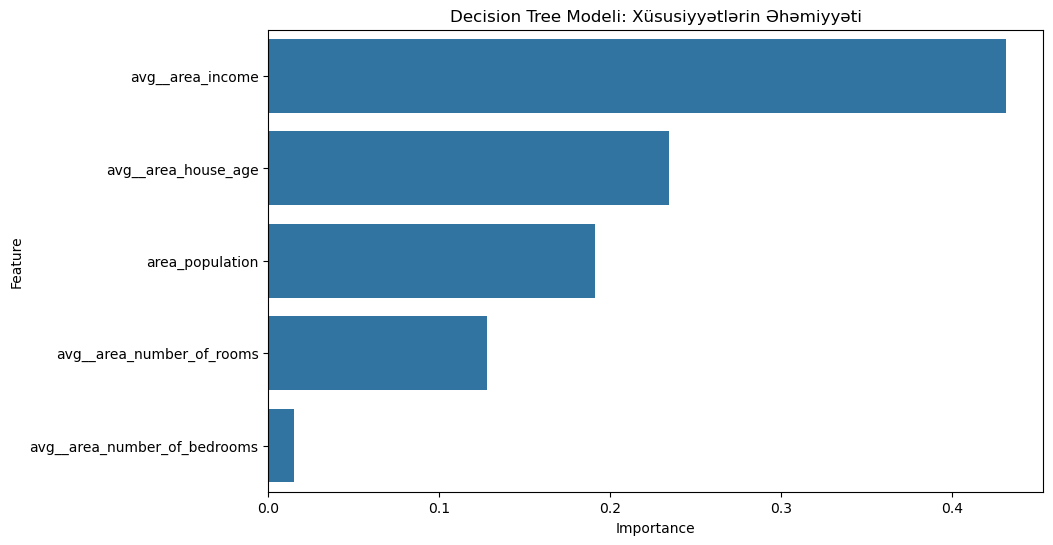

In [34]:
import pandas as pd
import numpy as np

# Məlumatları yükləyin
df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week4\day1\USA_Housing.csv')

# Sütun adlarını kiçik hərflərə çevirin və boşluqları alt xəttlərlə əvəz edin
df.columns = df.columns.str.lower().str.replace(pat='[. ]', repl='_', regex=True)

# X və y dəyişənlərini seçin
X = df.drop(columns=['address', "price"])
y = df['price']

# Məlumatları Standartlaşdırın
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_columns = X.columns
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X_columns)

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Modelling
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# Prediction
y_pred = model_tree.predict(X_test)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_compare.head()
# print(df1)

# Performans metrikləri
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

R2 = r2_score(y_test, y_pred)
print('R squared:', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('Adjusted R2:', adj_R2)
MAE = mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', MAPE)
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)
print()

# VIF (Variance Inflation Factor) hesablaması
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Xüsusiyyətləri seçin və Sabit sütununu əlavə edin
X_VIF = add_constant(X)

# VIF dəyərlərini hesablayın
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
print()

# Xüsusiyyətlərin əhəmiyyətini vizuallaşdırmaq
import matplotlib.pyplot as plt
import seaborn as sns

importance = model_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Decision Tree Modeli: Xüsusiyyətlərin Əhəmiyyəti')
plt.show()


### Random Forest Regressor

R squared: 0.8780192446053943
Adjusted R2: 0.877405659316689
MAE: 98583.59803870502
MAPE: 0.0927303860624214
MSE: 15076677555.29217
RMSE: 122787.12292130706

                        Feature  VIF
0              avg__area_income 1.00
1           avg__area_house_age 1.00
2     avg__area_number_of_rooms 1.27
3  avg__area_number_of_bedrooms 1.27
4               area_population 1.00

                        Feature  Importance
0              avg__area_income        0.44
1           avg__area_house_age        0.23
4               area_population        0.19
2     avg__area_number_of_rooms        0.12
3  avg__area_number_of_bedrooms        0.02


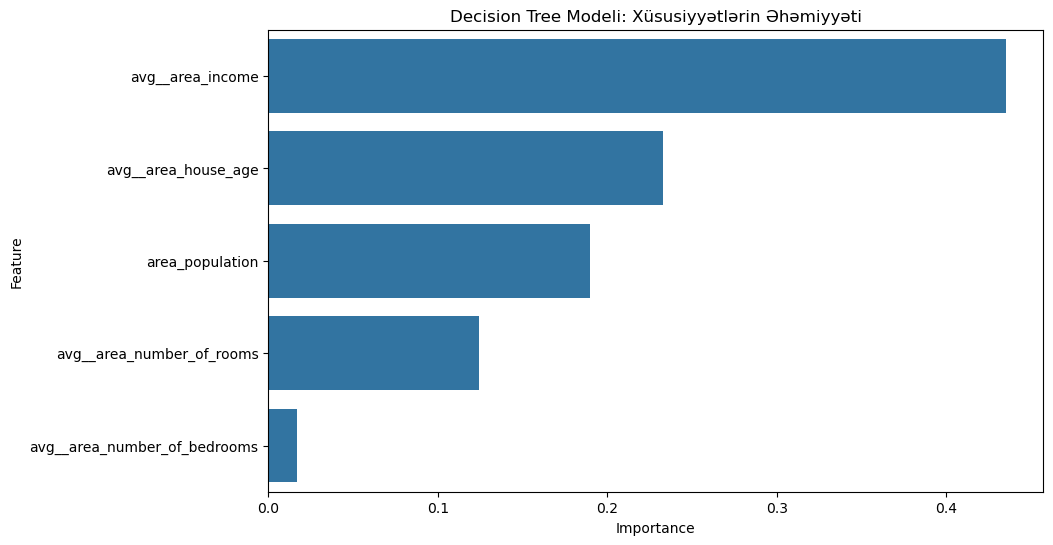

In [36]:
import pandas as pd
import numpy as np

# Məlumatları yükləyin
df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week4\day1\USA_Housing.csv')

# Sütun adlarını kiçik hərflərə çevirin və boşluqları alt xəttlərlə əvəz edin
df.columns = df.columns.str.lower().str.replace(pat='[. ]', repl='_', regex=True)

# X və y dəyişənlərini seçin
X = df.drop(columns=['address', "price"])
y = df['price']

# Məlumatları Standartlaşdırın
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_columns = X.columns
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X_columns)

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Modelling
from sklearn.ensemble import RandomForestRegressor
model_tree = RandomForestRegressor(random_state=0).fit(X_train, y_train)

# Prediction
y_pred = model_tree.predict(X_test)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_compare.head()
# print(df1)

# Performans metrikləri
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

R2 = r2_score(y_test, y_pred)
print('R squared:', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('Adjusted R2:', adj_R2)
MAE = mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', MAPE)
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)
print()

# VIF (Variance Inflation Factor) hesablaması
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Xüsusiyyətləri seçin və Sabit sütununu əlavə edin
X_VIF = add_constant(X)

# VIF dəyərlərini hesablayın
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
print()

# Xüsusiyyətlərin əhəmiyyətini vizuallaşdırmaq
import matplotlib.pyplot as plt
import seaborn as sns

importance = model_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Decision Tree Modeli: Xüsusiyyətlərin Əhəmiyyəti')
plt.show()